# Lesson 9 Assignment - Wine Neural Network

   ## Author - Mike Pearson

## Instructions
For this assignment you will start from the perceptron neural network notebook (Simple Perceptron Neural Network.ipynb) and modify the python code to make it into a multi-layer neural network. To test your system, use the RedWhiteWine.csv file with the goal of building a red or white wine classifier. Use all the features in the dataset, allowing the network to decide how to build the internal weighting system.

## Tasks
1. Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector
2. Use the provided Simple Perceptron Neural Network notebook (copied below) to develop a multi-layer feed-forward/backpropagation neural network
4. Be able to adjust the following between experiments:
<ul>
<li>Learning Rate
<li>Number of epochs
<li>Depth of architecture—number of hidden layers between the input and output layers
<li>Number of nodes in a hidden layer—width of the hidden layers
<li>(optional) Momentum
    </ul>
5. Determine what the best neural network structure and hyperparameter settings results in the
best predictive capability

In [56]:
# Data Set
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/RedWhiteWine.csv"

# Experiments with a Perceptron Model

In [94]:
import numpy as np
import pandas as pd

wine_data = pd.read_csv(URL)
##print(wine_data.head())
##print(wine_data.dtypes)
##print(wine_data.describe())
yn0 = 2*np.random.random((3,4)) - 1


# Create an artificial dataset
randy = 0.6/6497
x1 = np.array(np.arange(0.1,0.7,.1))
X1 = np.exp(x1 * 1.1 + 0.75)
x2 = np.array(np.arange(0.6,1.2,.1))
X2 = np.exp(x2 * 0.4 + 0.75)

#From the output, lets use 3 as threshold; Value>3 = class 1, value<3 = class 0
X = np.array([X1,X2])
Y = np.array([0,0,0,1,1,1])
##Y = np.random.randint(0, 10, 6497)

print(X.shape)
print(Y.shape)
print(yn0)

(2, 6)
(6,)
[[ 0.93638574 -0.01390486  0.9561014  -0.50135749]
 [ 0.96552706 -0.16839385  0.3517907   0.7301472 ]
 [-0.77429662 -0.82294929  0.64322454  0.52546871]]


### Logistic (Sigmoid) Function
Exponential values for moderately large numbers tend to overflow. So np.clip is used here to limit the values of the signal between -500 and 500. Since e^x is between 0 and 1, the error in using this clip is low. Additionally, I am using logistic (sigmoid) function $\frac{1}{1+e^-z}$. This can also be expressed as $\frac{e^z}{1+e^z}$. NOTE: you could call sklearn.linear_model.LogisticRegressionCV(), but it's always good to try and write it yourself so you understand what the function does. 

In [82]:
# Creating a numerically stable logistic s-shaped definition to call
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))

### Initialize Parameters
Because this there are not hidden layers, the second dimension is always assigned to 1. std is set to ${1^{-1}}$ to ensure values are between zero and 1. If zeros, there's no reason to multiply with std.

In [100]:
# define the dimentions and set the weights to random numbers
def init_parameters(dim1, dim2=12,std=1e-1, random = True):
    if(random):
        return(np.random.random([dim1,dim2])*std)
    else:
        return(np.zeros([dim1,dim2]))

### Forward Propagation
Here, I am assuming a single layered network. Note that event with single layered network, the layer itself can have multiple nodes. Also, I am using vectorized operations here i.e not using explicit loops. This helps in processing multiple inputs.

In [101]:
# Single layer network: Forward Prop
# Passed in the weight vectors, bias vector, the input vector and the Y
def fwd_prop(W1,bias,X,Y):

    Z1 = np.dot(W1,X) + bias # dot product of the weights and X + bias
    A1 = sigmoid(Z1)  # Uses sigmoid to create a predicted vector

    return(A1)

### Backpropagation

Here I am calculating the loss/cost. The loss function here is a logistic loss function and in this case of binary classification, this is also a cross-entropy loss

Cross Entropy loss for a single datapoint = $\sum_{i=1}^{c} y_i*log (\hat y_i) $
For binary classification: $y_i*log (\hat y_i) + (1-y_i)*log(1-\hat y_i) $

Lastly, the gradients W1 and B1 are calculated and returned along with the total cost/loss

In [102]:
#Single layer network: Backprop

def back_prop(A1,W1,bias,X,Y):

    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
   
    # Cross entropy loss function
    cost = (-1/m)*np.sum(Y*np.log(A1) + (1-Y)*np.log(1-A1)) # cost of error
    dZ1 = A1 - Y                                            # subtract actual from pred weights
    dW1 = (1/m) * np.dot(dZ1, X.T)                          # calc new weight vector
    dBias = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)  # calc new bias vector
    
    grads ={"dW1": dW1, "dB1":dBias} # Weight and bias vectors after backprop
    
    return(grads,cost)

### Gradient Descent
This function performs a simple gradient descent. After completing a round of forward propagation and backward propagation, the weights are updated based on the learning rate and gradient. The loss for that iteration is recorded in the loss_array. The function returns the final parameters W1 (updated weight vector), B1 (bias) and the loss array after running for given number of iterations.

In [103]:
def run_grad_desc(num_epochs,learning_rate,X,Y,n_1):
    
    n_0, m = np.shape(X)
    
    W1 = init_parameters(n_1, n_0, True)
    B1 = init_parameters(n_1,1, True)
    
    loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
    
    for i in np.arange(num_epochs):
        A1 = fwd_prop(W1,B1,X,Y)                # get predicted vector
        grads,cost = back_prop(A1,W1,B1,X,Y)    # get gradient and the cost from BP 
        
        W1 = W1 - learning_rate*grads["dW1"]    # update weight vector LR*gradient*[BP weights]
        B1 = B1 - learning_rate*grads["dB1"]    # update bias LR*gradient[BP bias]
        
        loss_array[i] = cost                    # loss array gets cross ent values
        
        parameter = {"W1":W1,"B1":B1}           # assign 
    
    return(parameter,loss_array)

### Arrange the Wine data, scale the features

Now that all of the helper functions are created we can run gradient descent on the handcrafted dataset that I had created earlier. Note that I am using n_1 = 1, therefore, I am just using one output node.

In [104]:
num_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                'sulphates', 'alcohol', 'quality']
 
##scaled_features = {}
scaled_wine_data = pd.DataFrame()
for each in num_features:
    mean, std = wine_data[each].mean(), wine_data[each].std(), 
    rng = np.max(wine_data[each]) - np.min(wine_data[each])
    scaled_features[each] = [mean, std]
    scaled_wine_data.loc[:, each] = (wine_data[each] - mean)/rng

print(scaled_wine_data.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean    5.608211e-16     -3.067277e-15  4.212037e-15   -1.136774e-16   
std     1.071433e-01      1.097576e-01  8.754088e-02    7.297245e-02   
min    -2.822568e-01     -1.731107e-01 -1.919477e-01   -7.428275e-02   
25%    -6.738075e-02     -7.311067e-02 -4.134531e-02   -5.587784e-02   
50%    -1.779397e-02     -3.311067e-02 -5.200732e-03   -3.747293e-02   
75%     4.005727e-02      4.022267e-02  4.299204e-02    4.074792e-02   
max     7.177432e-01      8.268893e-01  8.080523e-01    9.257172e-01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   1.114006e-15        -8.894056e-17         -1.392275e-16  1.260695e-13   
std    5.819535e-02         6.162986e-02          1.302347e-01  5.781132e-02   
min   -7.812934e-02        -1.0

## Now create the output data

In [105]:
output = wine_data['Class']
print(output.dtypes)
print(Y.shape)
n_0, m = np.shape(scaled_wine_data)
print(n_0)
print(m)

int64
(6,)
6497
12


In [108]:
num_epochs = 1000
learning_rate = 0.01
params, loss_array = run_grad_desc(num_epochs,learning_rate,scaled_wine_data,output,n_1= 6496 )
print(loss_array[num_epochs-1])

ValueError: operands could not be broadcast together with shapes (6497,) (6496,12) 

Here the boundary of separation is 0. That is values less than 0 belong to class 0 and greater than 0 belong to class 1.
Key thing to note here is that the data we generated was a linearly separable data and hence there are many possible options for the separting plane. Unlike SVM, logistic regression does not necessarily find the best separting plane, but finds a locally optimum solution that separates the classes of data. 

### Plot of the loss array
Here we want to ensure that the loss value per iteration is going down. However, note that the plot has not curved to reach stablizing value i.e we can run the algorithms more times to get a lower loss. However, this is not needed as the current value of the parameters can classify the input data accurately.

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0) #Set default plot sizes
plt.rcParams['image.interpolation'] = 'nearest' #Use nearest neighbor for rendering

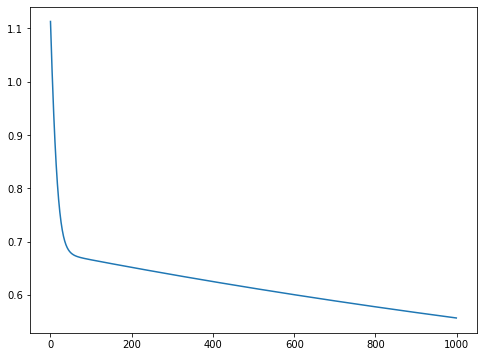

In [71]:
plt.plot(loss_array)
plt.show()

### Another example with handcrafted dataset
values below 0.5 are assigned to class 1 and values above are set to class 0.

In [ ]:
X = np.array([[0.25,0.75],[0.1,0.9],[0.3,0.8],[0.8,0.25],[0.9,0.2],[0.7,0.1]])
X = np.array([[0.11,0.12],[0.05,0.1],[0.15,0.11],[0.8,0.9],[0.9,0.8],[0.85,0.95]])
X = X.T #Had to do this because, I did not declare the X array as (#dimension * # Datapoints)
Y = np.array([1,1,1,0,0,0])
print(X)

In [ ]:
params, loss_array = run_grad_desc(100000,0.01,X,Y,n_1= 1 )

In [ ]:
plt.plot(loss_array)
plt.show()